# Vorbereitung  
--------------------------------

## Spektrometrische Messverfahren für $\alpha$-Strahlen  

__Ionisationskammer__: Gasvolumen zwischen zwei Elektroden einer Spannung $U$. Ist $U$ ausreichend hoch, gelangen alle entstehenden Ionen zu den Elektroden und tragen zum Messstrom bei. In diesem Bereich hängt der Messtrom nurnoch von der Größe des Gasvolumens und der Probe selbst ab.  
__Halbleiterzähler__: Spezielle, niedrig dotierte Diode. Ionisierende Teilchen (hier $\alpha$) erzeugen am pn-Übergang Elektron-Loch-Paare die im Feld des pn-Übergangs getrennt und über seitliche Elektroden abfließen. Diese Ladungsträger wiederum erzeugen an einem Widerstand einen messbaren Spannungsabfall der proportional zum Ionisationsvermögen und damit der Energie der Strahlung ist.  

## Oberflächensperrschichtdetektoren  
Basierend auf dem Prinzip der _Schottky_-Diode. Eine Metall-Halbleiterdiode wird in Sperrrichtung mit einer Gleichspannung Betrieben. Bei Ionisation an der Grenzschicht entstehen bewegliche Ladungsträger die als Strompuls messbar sind. Vorteil ist durch ihre geringe Dicke/Baugröße eine gute Messbarkeit von $\alpha$-Strahlung (geringe Eindringtiefe).

## Radium 226, Radium Folgeprodukte  
$$
\begin{align*}
    ^{226}_{80}\text{Ra} &\longrightarrow ^{222}_{86}\text{Rn} + \alpha (+ \gamma_{186 keV}) \\
    ^{222}_{86}\text{Rn} &\longrightarrow ^{218}_{84}\text{Po} + \alpha \\
    ^{218}_{84}\text{Po} &\longrightarrow ^{214}_{82}\text{Pb} + \alpha \\
    ^{214}_{82}\text{Pb} &\longrightarrow ^{214}_{83}\text{Bi} + \beta^- (+\gamma_{352, 295, 242, 53 keV} \\
    ^{214}_{83}\text{Bi} &\longrightarrow ^{214}_{84}\text{Po} + \beta^- (+\gamma_{609 keV} \\
    ...
\end{align*}
$$

## Zerfallsgesetz, Erweitertes Zerfallsgesetz  
$$
\begin{equation*}
	N(t) = N_0 \cdot e^{-\frac{t}{\tau}}
\end{equation*}
$$

## Vielkanalimpulshöhenanalysator, ADC  
Impulse werden anhand ihrer Amplitude und Pulsrate klassifiziert. Im internen **A**nalog-**D**igital-**C**onverter werden die Impulse - nach dem sie z.B. in einem Halbleiterdetektor ausgelöst und von einem Vorverstärker verstärkt wurden - nach ihrer Amplitude digitalisiert und an nachgeordnete Auswerteelektronik weiter gereicht.

## Entstehung des Impulshöhenspektrums, Energiekalibrierung  
Werden die Impulse nach Anzahl in der Veretikalen und Amplitude in der Horizontalen aufgetragen wird das entstehende Histogram Impulshöhenspektrum genannt. Es ist anzunehmen, dass die Impulshöhenverteilung bei einer bestimmten Strahlenquelle um eine definierte Energie normalverteilt ist. Mit einem bekannten Strahler wird zur Energiekalibrierung die Glocke entsprechend horizontal verschoben.

## Zerfall von Am-241, $\alpha$-Energien  
$T_{1/2} = 432,2 a$  
$$
\begin{equation*}
	^{241}_{95}\text{Am} \longrightarrow ^{237}_{93}\text{Np} + \alpha + \gamma_{59,5409 keV}
\end{equation*}
$$
Zu erwartende $\alpha$-Energien: $5,486 \text{MeV}$ (85%), $5,443 \text{MeV}$ (13%) und $5,388 \text{MeV}$ (2%).

## Reichweite von $\alpha$-Teilchen, Vorabsorption  
![alt text](referenzen/a-reichweite.jpg "Reichweite von $\alpha$-Teilchen durch Materie")  
Quelle: Eichler, Kronfeldt, Sahm - "Das neue physikalische Grundpraktikum", 2016  
_Bragg_-Beziehung.

## Alphaspektrometer (Bedienungsanleitung)

## Nulleffekt  
Zählrate $\neq 0$ bei Abwesenheit des untersuchten Strahlers.  
Ursächlich sind hier meist natürliche und/oder kosmische Hintergrundstrahlung. Im Falle des Halbleiterdetektors können aber auch Tunneleffekte an der Grenzschicht false-positives erzeugen. Die Nullrate muss im Vorfeld gemessen werden um die Abweichung der eigentlichen Messung zu minimieren.

# Auswertung
-------------------------

## To-do:

- [x] Eichstrahler $^{241}\text{Am}$ mit Vakuum zur Energiekalibrierung verwenden.
  - [ ] Halbwertsbreite (Energieauflösung).
  - [ ] Gesamtimpulsrate
  - [ ] Lage des Maximums (Zuordnung Kanalnummer -> Energie).
- Plot Eichstrahler energiekalibriert:
  - [ ] Eichstrahler ohne Vakuum (Gesamtimpulsrate, Energieauflösung, Lage des Maximums).
  - [ ] Eichstrahler mit Vakuum und Aluminium-Folie (Gesamtimpulsrate, Energieauflösung, Lage des Maximums).
- Teststrahler $^{226}\text{Ra}$ mit Vakuum:
  - [ ] Plot energiekalibriertes Spektrum.
  - [ ] $\alpha$ -Energien ermitteln.
  - [ ] Aktivitäten der gemessenen $\alpha$ -Strahler ermitteln.

## Importe

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
# import csv
from lmfit import Model, Parameters

In [2]:
# Lets create a list of all the data files included in "messdaten/" subdirectory
sample_files = os.listdir("messdaten/")
print(sample_files)

['Am241_first_try_ohne_vac(1).csv', 'Am241_first_try_ohne_vac.csv', 'Am241_mit_vac.csv', 'Am241_mit_vac_Al.csv', 'Leer_ohne_vac.csv', 'Ra226_mit_vac.csv']


In [3]:
# Opening the data iterating over all the files found in the cell above
spl_lst = []
for i,file in enumerate(sample_files):
    with open(("messdaten/" + file), newline='', encoding='utf-8') as path:
        frame = pd.read_csv(path, delimiter=';')
        frame.columns = [col.strip() for col in frame] # stupid whitespaces t(-_-t)
        spl_lst.append(frame)
        del frame

# print(spl_lst[0])
Am_wo_vac1 = spl_lst[0]
Am_wo_vac2 = spl_lst[1]
Am_w_vac = spl_lst[2]
Am_w_vac_w_Al = spl_lst[3]
Empty_wo_vac = spl_lst[4]
Ra_w_vac = spl_lst[5]

## Plots

In [4]:
# Nightowl mode
plt.style.use("default")
plt.style.use("dark_background")
cm = 1/2.54 # inch to cm, metric like brrr

### Gauss-Modelfunktion

$$
\begin{equation}
	f(x) = \frac{A}{\sigma \sqrt{2\pi}} \cdot exp\left(-\frac{(x-x_0)^2}{2\sigma^2}\right)
\end{equation}
$$

* $x_0 :=$ Lage des Maximums  
* $\sigma :=$ FWMH (Breite der Glocke bei der Hälfte des Maximums)
* $a :=$ Maximum

In [5]:
def gauss(x, A, center, sigma):
    return A * np.exp(-(x-center)**2/(2*sigma**2))

def gauss_calib(x, sigma):
    return 2170 * np.exp(-(x-5486)**2/(2*sigma**2))

### Faltung Exponentialfunktion und Gauss

$$
\begin{equation*}
f(x - x_0; \sigma, \tau) = \frac{A}{2\tau} \cdot exp \left( \frac{x - x_0}{\tau} + \frac{\sigma^2}{2\tau^2} \right) \cdot erfc\left( \frac{1}{\sqrt{2}}\left( \frac{x - x_0}{\sigma} + \frac{\sigma}{\tau} \right) \right)
\end{equation*}

* $A :=$ Maximum
* $\tau :=$ Exponentialfaktor
* $\sigma :=$ FWHM Gauss
* $x_0 :=$ Lage des Peaks

In [6]:
from scipy.special import erfc
def conv_expo_gauss(x, A, tau, sigma, x0):
	return (A/(2*tau)) * np.exp(((x-x0)/tau) + (sigma**2/(2*tau**2))) * erfc((1/np.sqrt(2)) * (((x-x0)/sigma) + sigma/tau))

### Am214 **mit** Vakuum, **ohne** Absorber, unkalibriert

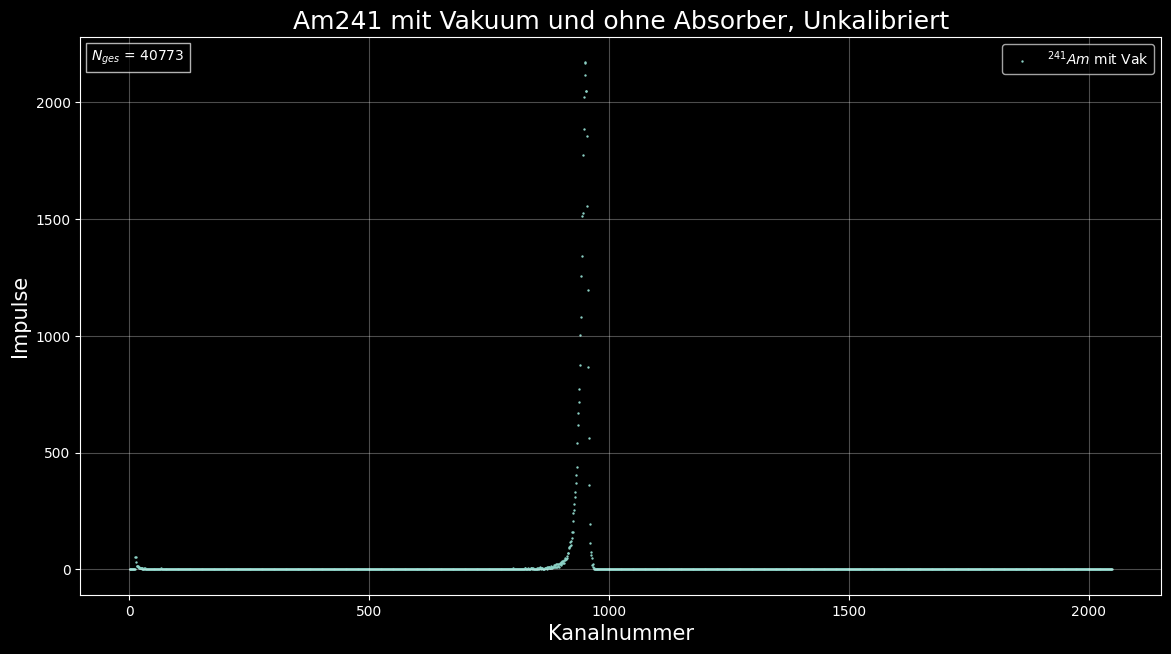

In [7]:
size=60
fig, ax = plt.subplots(figsize=(30*cm, 30*(9/16)*cm))

ax.scatter(Am_w_vac["Kanal"], Am_w_vac["Impulse"], s=.5, label="$^{241}Am$ mit Vak")

ax.text(0.01, 0.98, "$N_{{ges}}$ = {}".format(sum(Am_w_vac["Impulse"])), horizontalalignment="left", verticalalignment="top", transform=ax.transAxes, bbox=dict(facecolor='black', alpha=0.7))
ax.set_title("Am241 mit Vakuum und ohne Absorber, Unkalibriert", fontsize=0.3*size)
ax.set_xlabel("Kanalnummer", fontsize=0.25*size)
ax.set_ylabel("Impulse", fontsize=0.25*size)
ax.legend()
ax.grid(axis='both', alpha=.3)

plt.tight_layout()

### Definition der Funktionen zur Energiekalibrierung

Um die Daten zu kalibrieren, müssen die ``Energie(keV)``-Zeilen so entlang der ``Impulse``-Zeilen verschoben werden, dass der Peak bei der entsprechenden Energie zum liegen kommt.  

Wie gehen wir dabei vor?

1. Peakindex des *Eichstrahlers* $^{241}\text{Am}$ im Vakuum und ohne Absorber suchen.
2. Einen Proportionalitätsfaktor finden, der auf die Energiewerte angewandt den Peak-Index auf $5486$ keV legt.
3. Energiewerte für Linke und Rechts Seite der halben Impulshöhe des Peaks finden.
4. Energieauflösung aus der Differenz finden.

In [8]:
def find_fwmh(array):
	array = np.asarray(array)
	peakidx = array.argmax()
	half_max = array[peakidx] / 2
	left = array[0:peakidx]
	right = array[peakidx:-1]
	idx1 = (np.abs(left - half_max)).argmin()
	idx2 = (np.abs(right - half_max)).argmin() + peakidx
	return idx1, idx2

In [9]:
def EvenBetterEnergyCalib(calib_frame, energy=1):
	# 1.
	peakidx = calib_frame["Impulse"].idxmax()
	# 2.
	coeff = energy / calib_frame["Energie(keV)"][peakidx]
	# 3.
	idx1, idx2 = find_fwmh(calib_frame["Impulse"])
	# 4.
	fwmh = coeff * (calib_frame["Energie(keV)"].iloc[idx2] - calib_frame["Energie(keV)"].iloc[idx1])

	return coeff, fwmh, idx1, idx2

In [10]:
# Debug: delete after
print(EvenBetterEnergyCalib(Am_w_vac, 5486))
print(Am_w_vac["Impulse"].iloc[940])
print(Am_w_vac["Impulse"].iloc[955])

(5.774736842105263, 86.62105263157895, 940, 955)
1080
1194


### Am214 **mit** Vakuum, **ohne** Absorber -> Kalibrierung

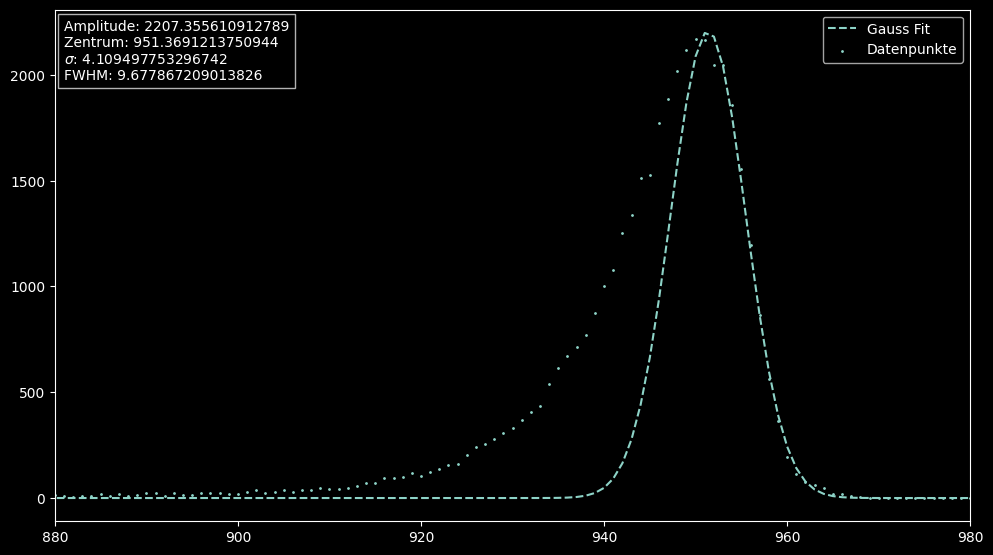

In [11]:
xarr = Am_w_vac["Energie(keV)"]
yarr = Am_w_vac["Impulse"]
fitrange = np.arange(949, len(Am_w_vac), 1)
xfit = np.asarray(Am_w_vac["Energie(keV)"][fitrange])
yfit = np.asarray(Am_w_vac["Impulse"][fitrange])

gmodel = Model(gauss)
params = Parameters()
params.add('A', value=2170, min=1800)
params.add('center', value=950, min=925)
params.add('sigma', value=20, min=0.001)
result = gmodel.fit(yfit, params, x=xfit)
# print(result.fit_report())
best_vals = list(result.best_values.values())
ecoeff = 5486 / best_vals[1]
best_vals_string = "Amplitude: {0}\nZentrum: {1}\n$\sigma$: {2}\nFWHM: {3}".format(best_vals[0], best_vals[1], best_vals[2], best_vals[2]*2.355)

fig, ax = plt.subplots(figsize=(30*cm, 30*(9/16)*cm))
plt.scatter(xarr, yarr, s=1, label="Datenpunkte")
plt.plot(xarr, gauss(xarr, *best_vals), '--', label="Gauss Fit")
plt.text(0.01, 0.98, best_vals_string, horizontalalignment="left", verticalalignment="top", transform=ax.transAxes, bbox=dict(facecolor='black', alpha=0.7))

plt.xlim(left=880, right=980)
plt.legend()
plt.show()

In [33]:
def x1x2(x0, sigma):
	x1 = (x0) + np.sqrt(x0**2 - (x0**2 - np.log(2) * 2 * sigma**2))
	x2 = (x0) - np.sqrt(x0**2 - (x0**2 - np.log(2) * 2 * sigma**2))
	return x1, x2
x1x2(5486, 29.73321)

(5521.008179455555, 5450.991820544445)

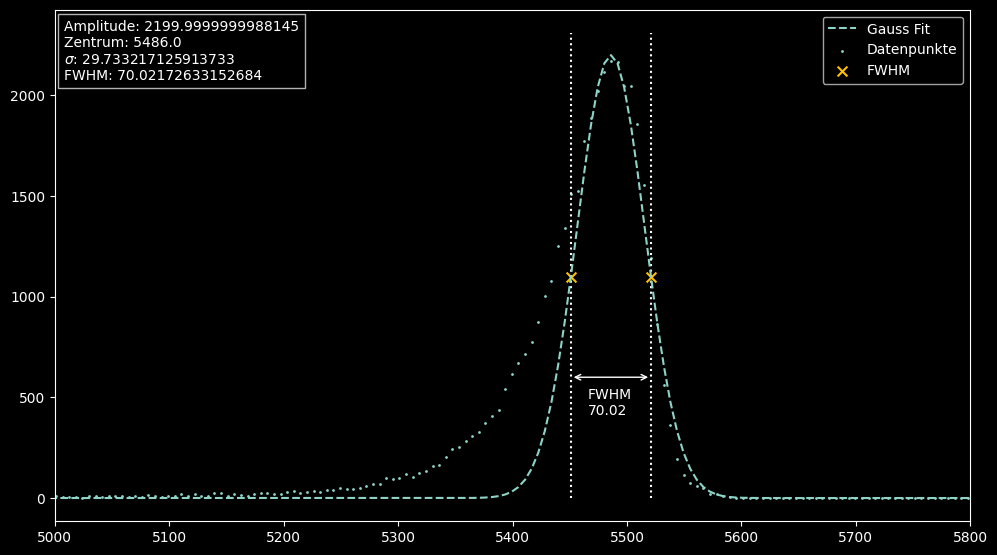

In [92]:
xarr = Am_w_vac["Energie(keV)"] * ecoeff
yarr = Am_w_vac["Impulse"]
fitrange = np.arange(949, len(xarr), 1)
xfit = np.asarray(xarr[fitrange])
yfit = np.asarray(yarr[fitrange])

gmodel = Model(gauss)
params = Parameters()
params.add('A', value=2170, min=1800, max=2200)
params.add('center', value=5486, min=5000, max=5486)
params.add('sigma', value=20, min=0.001)
result = gmodel.fit(yfit, params, x=xfit)
# print(result.fit_report())
best_vals = list(result.best_values.values())
best_vals_string = "Amplitude: {0}\nZentrum: {1}\n$\sigma$: {2}\nFWHM: {3}".format(best_vals[0], best_vals[1], best_vals[2], best_vals[2]*2.355)

fig, ax = plt.subplots(figsize=(30*cm, 30*(9/16)*cm))
plt.scatter(xarr, yarr, s=1, label="Datenpunkte")

plt.plot(xarr, gauss(xarr, *best_vals), '--', label="Gauss Fit")
# print(best_vals)
fwhm_sct = x1x2(best_vals[1], best_vals[2])
plt.scatter(fwhm_sct, [best_vals[0]/2, best_vals[0]/2], marker="x", s=50, label="FWHM", color="#ffc000")
plt.vlines((fwhm_sct[0], fwhm_sct[1]), ymin=0, ymax=max(plt.gca().get_ylim()), linestyle=":", color="#ffffff")
plt.annotate("", (fwhm_sct[0], (best_vals[0]/2)-500), (fwhm_sct[1], (best_vals[0]/2)-500), arrowprops={"arrowstyle": "<->"})
plt.text(fwhm_sct[1]+15, (best_vals[0]/2)-550, "FWHM\n{}".format(round(2.3548*best_vals[2], 2)), horizontalalignment="left", verticalalignment="top")

plt.text(0.01, 0.98, best_vals_string, horizontalalignment="left", verticalalignment="top", transform=ax.transAxes, bbox=dict(facecolor='black', alpha=0.7))

plt.xlim(left=5000, right=5800)
plt.legend()
plt.show()

C:\Users\Hunter\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[[Model]]
    Model(gauss)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 1099
    # variables        = 3
    chi-square         = 26338833.0
    reduced chi-square = 24031.7819
    Akaike info crit   = 11088.7545
    Bayesian info crit = 11103.7610
##  Warning: uncertainties could not be estimated:
    A:       at initial value
    center:  at initial value
    sigma:   at initial value
[[Variables]]
    A:       2170.00000 (init = 2170)
    center:  5486.00000 (init = 5486)
    sigma:   20.0000000 (init = 20)


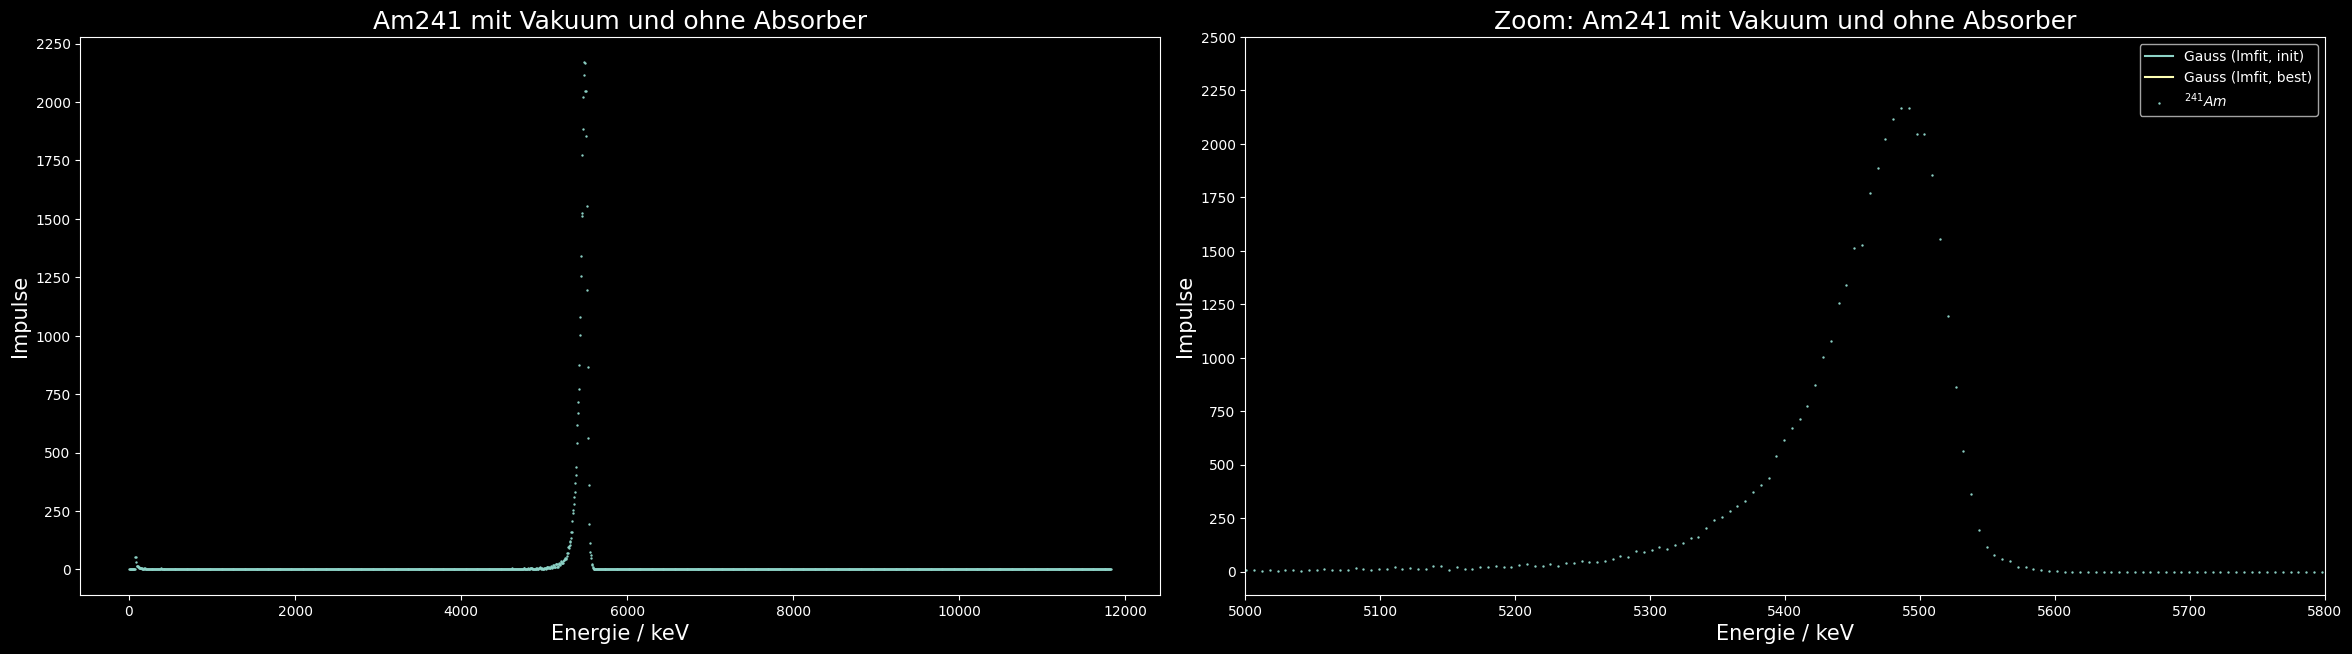

In [13]:
ecoeff, fwmh, fwmh_left_idx, fwmh_right_idx = EvenBetterEnergyCalib(Am_w_vac, 5486)
xarr = np.asarray(Am_w_vac["Energie(keV)"] * ecoeff)
yarr = np.asarray(Am_w_vac["Impulse"])
# === CURVE_FIT =======
fitrange = np.arange(949, len(Am_w_vac), 1)
popt, pcov = curve_fit(gauss, Am_w_vac["Energie(keV)"][fitrange], Am_w_vac["Impulse"][fitrange], p0=[2170, 5486, 25])
# === LMFIT ===========
result = gmodel.fit(Am_w_vac["Impulse"][fitrange], params, x=Am_w_vac["Energie(keV)"][fitrange])
print(result.fit_report())

size=60
fig, (full, zoom) = plt.subplots(1, 2, figsize=(60*cm, 30*(9/16)*cm))

zoom.scatter(xarr, yarr, s=.5, label="$^{241}Am$")
# zoom.scatter(xarr[fwmh_left_idx], yarr[fwmh_left_idx], marker="o", color="#00FF00", label="Linke Flanke FWMH")
# zoom.scatter(xarr[fwmh_right_idx], yarr[fwmh_right_idx], marker="o", color="#00FF00", label="Rechte Flanke FWMH")
# zoom.plot(xarr, gauss(xarr, *popt), label="Gauss (scipy)")
zoom.plot(Am_w_vac["Energie(keV)"][fitrange], result.init_fit, label="Gauss (lmfit, init)")
zoom.plot(Am_w_vac["Energie(keV)"][fitrange], result.best_fit, label="Gauss (lmfit, best)")

zoom.set_yticks(np.arange(0, max(yarr)+501, 250))
full.set_yticks(np.arange(0, max(yarr)+501, 250))
zoom.set_xlim(left=5000, right=5800)

annotation_text = "FWMH {} keV".format(round(fwmh, 2))
# zoom.annotate(annotation_text, (xarr[fwmh_right_idx], yarr[fwmh_right_idx]), (5600, 1750), arrowprops={"arrowstyle": "->"})
# zoom.annotate(annotation_text, (xarr[fwmh_left_idx], yarr[fwmh_left_idx]), (5600, 1750), arrowprops={"arrowstyle": "->"})
# zoom.zoom.text(0.01, 0.98, "$N_{{ges}}$ = {}".format(sum(yarr)), horizontalalignment="left", verticalalignment="top", transform=ax.transAxes, bbox=dict(facecolor='black', alpha=0.7))

full.set_title("Am241 mit Vakuum und ohne Absorber", fontsize=0.3*size)
zoom.set_title("Zoom: Am241 mit Vakuum und ohne Absorber", fontsize=0.3*size)
full.set_xlabel("Energie / keV", fontsize=0.25*size)
full.set_ylabel("Impulse", fontsize=0.25*size)
zoom.set_xlabel("Energie / keV", fontsize=0.25*size)
zoom.set_ylabel("Impulse", fontsize=0.25*size)
zoom.legend()

# zoom.grid(axis='both', alpha=.3)

full.scatter(xarr, yarr, s=.5, label="$^{241}Am$")

plt.tight_layout()

### Am214 **mit** Vakuum, **ohne** Absorber, fitted

In [14]:
fitrange = np.arange(949, len(Am_w_vac), 1)
xarr = Am_w_vac["Energie(keV)"][fitrange]
yarr = Am_w_vac["Impulse"][fitrange]
guess = 25
popt, pcov = curve_fit(gauss, xarr, yarr, p0=guess)
print(*popt)
xarr = Am_w_vac["Energie(keV)"]
yarr = Am_w_vac["Impulse"]

size=60
fig, ax = plt.subplots(figsize=(30*cm, 30*(9/16)*cm))

ax.scatter(xarr, yarr, s=.5, label="Impulshöhen")
ax.plot(xarr, gauss_calib(xarr, *popt), label="Gauss Fit")

ax.set_yticks(np.arange(0, max(yarr)+501, 250))
ax.set_xlim(5000,5800)

ax.set_title("Am241 mit Vakuum und ohne Absorber", fontsize=0.3*size)
ax.set_xlabel("Energie / keV", fontsize=0.25*size)
ax.set_ylabel("Impulse", fontsize=0.25*size)
ax.text(0.01, 0.98, "$N_{{ges}}$ = {}".format(sum(yarr)), horizontalalignment="left", verticalalignment="top", transform=ax.transAxes, bbox=dict(facecolor='black', alpha=0.7))
ax.legend()

ax.grid(axis='both', alpha=.3)

plt.tight_layout()

TypeError: gauss() missing 2 required positional arguments: 'center' and 'sigma'

### Am241 **mit** Vakuum, **mit** Absorber, fitted

In [ ]:
from lmfit import Model

In [ ]:
gmodel = Model(gauss)
print('parameter names: {}'.format(gmodel.param_names))
print('independent variables: {}'.format(gmodel.independent_vars))

In [ ]:
print(ecoeff)
xarr = Am_w_vac_w_Al["Energie(keV)"]*ecoeff
yarr = Am_w_vac_w_Al["Impulse"]

size = 60
fig, ax = plt.subplots(figsize=(30*cm, 30*(9/16)*cm))

ax.scatter(Am_w_vac_w_Al["Energie(keV)"]*ecoeff, Am_w_vac_w_Al["Impulse"], label="Am241 w VAC + Al", s=.5)

guess = [max(yarr), 300, 16] # a, x0, sigma
bounds = [
	[max(yarr)-1, 0, 0],
	[max(yarr)+1, 5500, 1000]]
popt, pcov = curve_fit(gauss, Am_w_vac_w_Al["Energie(keV)"]*ecoeff, Am_w_vac_w_Al["Impulse"], p0=guess, maxfev=5000)
print(popt)
# ax.plot(Am_w_vac_w_Al["Energie(keV)"]*ecoeff, gauss(Am_w_vac_w_Al["Energie(keV)"]*ecoeff, *popt), label="Fit w VAC + Al")

ax.set_title("Am241 mit Vakuum und mit Absorber", fontsize=0.3*size)
ax.set_xlabel("Energie / keV", fontsize=0.25*size)
ax.set_ylabel("Impulse", fontsize=0.25*size)
ax.text(0.01, 0.98, "$N_{{ges}}$ = {}".format(sum(Am_w_vac_w_Al["Impulse"])), horizontalalignment="left", verticalalignment="top", transform=ax.transAxes, bbox=dict(facecolor='black', alpha=0.7))
ax.legend()

ax.grid(axis='both', alpha=.3)

plt.tight_layout()

In [ ]:
size = 60
fig, ax = plt.subplots(figsize=(30*cm, 30*(9/16)*cm))

ax.plot(Am_w_vac["Energie(keV)"], Am_w_vac["Impulse"], color="#A0A0A0", linestyle="--", label="Am241 w VAC")
ax.scatter(Am_wo_vac["Energie(keV)"]*ecoeff, Am_wo_vac["Impulse"], label="Am241 w VAC", s=.5)
ax.scatter(Am_w_vac_w_Al["Energie(keV)"]*ecoeff, Am_w_vac_w_Al["Impulse"], label="Am241 w VAC + Al", s=.5)

popt, pcov = fitting(Am_wo_vac, gauss, [215,4100,25,0])
ax.plot(Am_wo_vac["Energie(keV)"]*ecoeff, gauss(Am_wo_vac["Energie(keV)"]*ecoeff, *popt), label="Fit w/o VAC")

popt, pcov = fitting(Am_w_vac_w_Al, gauss, [215,4100,25,0])
ax.plot(Am_w_vac_w_Al["Energie(keV)"]*ecoeff, gauss(Am_w_vac_w_Al["Energie(keV)"]*ecoeff, *popt), label="Fit w VAC + Al")

ax.set_xticks(np.arange(0, 12000, 1000))
ax.set_yticks(np.arange(0, 2500, 250))

ax.set_title("Am241 Probe in verschiedenen Konfigurationen", fontsize=0.3*size)
ax.set_xlabel("Energie / keV", fontsize=0.25*size)
ax.set_ylabel("Impulse", fontsize=0.25*size)
ax.legend()

ax.grid(axis='both', alpha=.3)

plt.tight_layout()

### Ra226 **mit** Vakuum

In [ ]:
xarr = Ra_w_vac["Energie(keV)"]*ecoeff
yarr = Ra_w_vac["Impulse"]

size = 60
fig, ax = plt.subplots(figsize=(30*cm, 30*(9/16)*cm))

ax.plot(Ra_w_vac["Energie(keV)"]*ecoeff, Ra_w_vac["Impulse"], label="Ra226 mit Vak")

ax.set_xticks(np.arange(0, 12000, 1000))
ax.set_yticks(np.arange(0, 120000, 10000))

ax.set_title("Radium226 mit Vakuum", fontsize=0.3*size)
ax.set_xlabel("Energie / keV", fontsize=0.25*size)
ax.set_ylabel("Impulse", fontsize=0.25*size)
ax.text(0.989, 0.91, "$N_{{ges}}$ = {}".format(sum(yarr)), horizontalalignment="right", verticalalignment="top", transform=ax.transAxes, bbox=dict(facecolor='black', alpha=0.7))
ax.legend()

ax.grid(axis='both', alpha=.3)

plt.tight_layout()

### Leermessung ohne Vakuum

In [ ]:
size = 60
fig, ax = plt.subplots(figsize=(30*cm, 30*(9/16)*cm))

ax.scatter(Empty_wo_vac["Energie(keV)"]*ecoeff, Empty_wo_vac["Impulse"], s=.5, label="Leermessung ohne VAC")

ax.set_title("Kalibriert", fontsize=0.3*size)
ax.set_xlabel("Energie / keV", fontsize=0.25*size)
ax.set_ylabel("Impulse", fontsize=0.25*size)
ax.legend()

ax.grid(axis='both', alpha=.3)

plt.tight_layout()